# <p style="text-align: center;">Shooting Incidents 2014 - 2018 dataset</p>

The following files were obtined from the Gun Violence Archive (GVA) website, 5 datasets each providing information on incidents that have occured in a single year in the United States of America. The datasets are joined together to provide further insight on this epidemic, comparing rates and statistics between 45 states. (Datasets on GVA website do not include any information on the following 5 states: Hawaii, Idaho, New Hampshire, North Dakota & Wyoming).

In [3]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Concatenate 5 data framess collected from GVA site.
df_18 = pd.read_csv(r'2018.csv')

df_17 = pd.read_csv(r'2017.csv')

df_16 = pd.read_csv(r'2016.csv')

df_15 = pd.read_csv(r'2015.csv')

df_14 = pd.read_csv(r'2014.csv')

#Drop Operations Column as it is not needed.

data = [df_18, df_17, df_16, df_15, df_14]
df = pd.concat(data)
df = df.drop(['Operations'], axis = 1)

# Convert string to datetime:

df['Incident Date'] = pd.to_datetime(df['Incident Date'])

# Create two new columns from newly converted datetime column this will assist with providing useful data. 
df['Month'] = pd.to_datetime(df['Incident Date']).dt.strftime('%m')
df['Year'] = pd.to_datetime(df['Incident Date']).dt.strftime('%y')
df

,Incident Date,State,City Or County,Address,# Killed,# Injured,Month,Year
0,2018-11-25,Texas,Houston,4500 block of Yale St,1,3,11,18
1,2018-11-25,Alabama,Demopolis,Floyd St and Field St,2,2,11,18
2,2018-11-25,California,Oakland,1000 block of 24th St,0,4,11,18
3,2018-11-24,Florida,Orlando,5898 S Orange Blossom Trail,2,2,11,18
4,2018-11-23,Florida,Miami,5801 NW 27th Ave,2,5,11,18
5,2018-11-22,Indiana,Fort Wayne,6100 block of Downingtown Dr,3,2,11,18
6,2018-11-21,Missouri,Saint Louis,4200 block of Shreve Ave,0,4,11,18
7,2018-11-19,Pennsylvania,Philadelphia,5100 block of Malcolm St,4,0,11,18
8,2018-11-19,Colorado,Denver,1200 21st Street,1,4,11,18
9,2018-11-18,California,Los Angeles (Watts),95th St and Defiance Ave,1,4,11,18


### General stats from shooting dataset (df)

#### Total incidents (All killed and injured within 5 years)

In [4]:
# Sum of all kills and injuries located in given dataset. t_inc
t_inc = df['# Killed'].sum() + df['# Injured'].sum()
t_inc

8920

#### Total Killed (within 5 years)

In [5]:
# Sum of all killed in shooting incidents 2014 - 2018.

t_kill = df['# Killed'].sum()
t_kill

1883

#### Total Injured (within 5 years)

In [6]:
# Sum of all injured in shooting incidents 2014 - 2018.
'''Injuries could vary from minor wounds to amputation. Unfortunately the extracted dataset does not provide
this information. For this case study, I am solely looking at all those that are affected, whether injured or killed,
from shooting incidents.'''

t_inj = df['# Injured'].sum()
t_inj

7037

#### Number of killed and injured each year (2014 - 2018)

In [7]:
# Total number of killed and injured in each year, during the 5 year period. t_yr
t_yr = df.groupby(['Year']).sum()
t_yr

,# Killed,# Injured
Year,,
14,265,1079
15,368,1337
16,451,1538
17,437,1803
18,362,1280


#### Number of killed and injured per month in last 5 years

In [8]:
# Total number of killed and injured in each month during the 5 year period 2014 - 2018.

t_mth = df.groupby(['Month']).sum()
t_mth

,# Killed,# Injured
Month,,
01,133,368
02,168,375
03,99,381
04,138,510
05,146,579
06,230,822
07,184,882
08,156,741
09,145,594


### Total number of states in dataset = 46

Missing and incomplete data on Gun Violence Archive site: Hawaii, Idaho, New Hampshire, North Dakota and Wyoming.


In [9]:
# Show number of killed and injured per state (i.e. total affected): t_stt
t_stt = df.groupby(['State']).sum()

'''Count the number of states included in df. This shows what states are missing from the imported dataset!'''

print ('\nStates =',t_stt.count(axis= 0)[0])

t_stt["Total"] = t_stt["# Killed"].add(t_stt["# Injured"])
t_stt


States = 46


,# Killed,# Injured,Total
State,,,
Alabama,39,168,207
Alaska,0,6,6
Arizona,37,52,89
Arkansas,18,85,103
California,201,761,962
Colorado,23,66,89
Connecticut,5,66,71
Delaware,6,18,24
District of Columbia,7,103,110


In [10]:
# Top 5 incident prone states - these values can be seen in a bar chart presented below providing absolute values
# for each category

t_stt['Total'] = t_stt['Total'].astype(str).astype(int)
# Ordering Total column in t_stt from largest to smallest. inc_stt
inc_stt = t_stt['Total'].nlargest(46)
# Top 5 states with highest amount of incidents occured in the 5 year period 2014 - 2018.
inc_stt.head()

State
California    962
Illinois      779
Florida       764
Texas         605
Nevada        552
Name: Total, dtype: int32

#### Most amount killed in single incident

In [11]:
'''max_killed indicates the single most deadliest shooting incident in the shooting dataset (df).
The address will then be used to pinpoint and plot the exact location of the incident.'''

# Provides data on maximum number of killed in a single shooting incident.
max_killed = df['# Killed'].max()
# Provides us with all the details of the particular incident found in shooting dataset
max_killed = df[df['# Killed'] == max_killed]
max_killed

,Incident Date,State,City Or County,Address,# Killed,# Injured,Month,Year
71,2017-10-01,Nevada,Las Vegas,3950 Las Vegas Blvd S,59,441,10,17


#### Least amount killed in single incident  (789 incidents where no one was killed)

In [12]:
'''min_killed shows incidents with least killed. In this case there are 789 incidents where no deaths occured.'''

# Provides data on minimum number of killed in a single shooting incident.
min_killed = df['# Killed'].min()
# Provides us with all the details on the particular incident found in shooting dataset
min_killed = df[df['# Killed'] == min_killed]
min_killed

,Incident Date,State,City Or County,Address,# Killed,# Injured,Month,Year
2,2018-11-25,California,Oakland,1000 block of 24th St,0,4,11,18
6,2018-11-21,Missouri,Saint Louis,4200 block of Shreve Ave,0,4,11,18
17,2018-11-03,New York,Watertown,136 Franklin St,0,5,11,18
18,2018-11-02,California,Long Beach (North Long Beach),5800 block of Brayton Ave,0,4,11,18
20,2018-11-01,Minnesota,Minneapolis,3400 block of Girard Ave N,0,5,11,18
24,2018-10-30,California,Los Angeles,65th Place and Vermont Avenue,0,5,10,18
25,2018-10-29,California,Riverside,3252 Mission Inn Ave,0,7,10,18
27,2018-10-27,Tennessee,Memphis,4275 Ladyslipper,0,5,10,18
30,2018-10-24,Illinois,Chicago,6200 block of S King Dr,0,5,10,18
31,2018-10-22,Illinois,Chicago,9231 S Cottage Grove Av,0,6,10,18


# Graphs

Graphs show absolute values on those killed <font color = orange>orange</font> and injured <font color = blue>blue</font>. The final graph titled *Total killed and injured per state 2014 - 2018 (agg. 5 yrs)* has a third <font color = green>green</font> bar that adds killed and injured to provide total amount of incidents that have occured in each state. These graphs are far from perfect, 5 states are missing from the data and are highly biased due to obtaining the data from a single source. However, it does show the reader some states are more 'incident-prone' than others. This could be due to a number of factors, some of which will be analysed in the following section 'Interactive Maps'.

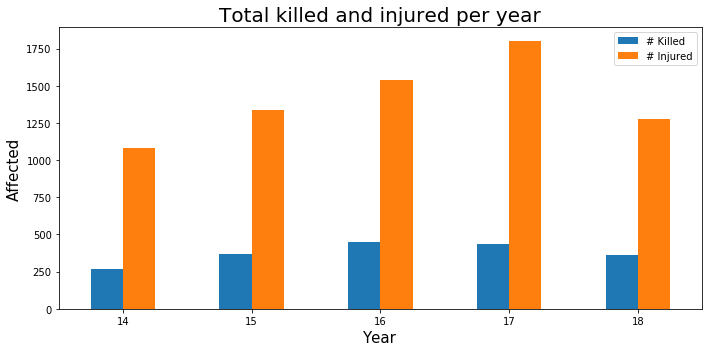

In [13]:
'''Graphs have been converted from stacked to regular bar charts for more visability. Values shown are absolute.'''

# Total killed and injured per year graph: t_yr
t_yr.plot.bar(figsize = (10,5))
plt.title('Total killed and injured per year', size = 20)
plt.xticks(rotation=0)
plt.xlabel('Year', size = 15)
plt.ylabel('Affected', size = 15)
plt.tight_layout()
plt.legend(loc='best')

plt.show()

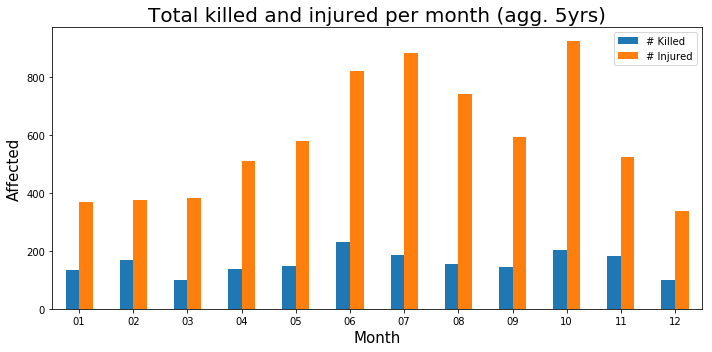

In [14]:
# Total killed and injured per month graph: t_mth
t_mth.plot.bar(figsize = (10,5))
plt.title('Total killed and injured per month (agg. 5yrs)', size = 20)
plt.xticks(rotation=0)
plt.xlabel('Month', size = 15)
plt.ylabel('Affected', size = 15)
plt.tight_layout()
plt.legend(loc='best')

plt.show()

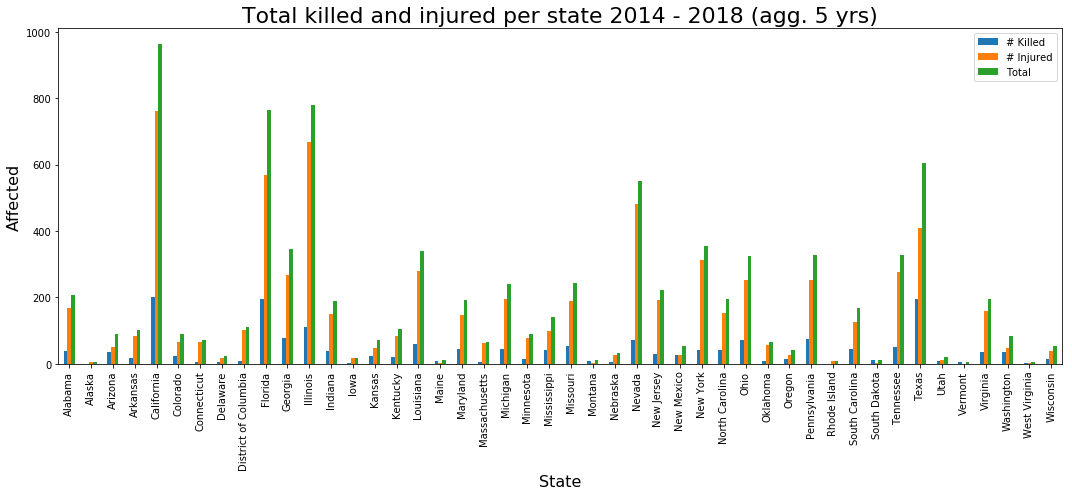

In [15]:
t_stt.plot.bar(figsize = (15,7))
plt.title('Total killed and injured per state 2014 - 2018 (agg. 5 yrs)', size = 22)
plt.xticks(rotation=90)
plt.xlabel('State', size = 16)
plt.ylabel('Affected', size = 16)
plt.tight_layout()
plt.legend(loc='best')

plt.show()

### Graph Analysis

From the graph above we can see that most incidents (incidents = killed + injured) occured in 2017 followed by 2016. 2018 is considerably lower but that could be due to multiple factors (i.e. gathering data prior to end of the year, missing data on particular shooting incidents, etc) - causing skewness and bias in the data provided.

In the months bar chart we see that there are three months where incidents spiked across the country - June, July and October. The intent of this was to see if there was an outlier in any of the months, this could be used to hypothesize whether certain factors such as weather (June, July - hot holiday season that increases <font color=red> population </font> in certain incident prone states) correlate with the number of shooting incidents.

The final bar chart has three bars - # Killed, # Injured and Total (# Killed + # Injured). The values are absolute and do not take any other factors into account. As seen above <font color = green>t_stt</font> 5 states stand out in the graph: California, Florida, Illinois, Nevada and Texas (deadliest 5).

# Interactive Maps

Three types of maps/libraries that provide further insight on specific areas:

1) Folium, is used to pinpoint the deadliest shooting incident that occured in the past 5 years

2) Plotly, open source API libraries that provide easy configurations for visual data. It is used to provide an interactive map of the United States, visualising the population (2017 taken as case study) and shooting incidents in each state

3) Geopandas, open source project working that extends work used by pandas to allow spatial operations on geometric types. 

## Folium

Folium is a powerful data visualization library in Python that was built primarily to help people visualize geospatial data. With Folium, one can create a map of any location in the world if its latitude and longitude values are known. In this case I have used folium to map out the deadliest incident logged into the shooting dataset **df**
***
In order to center the map in a specific area I have conducted an online search on the address linked with the shooting - **3950 Las Vegas Blvd S**. The coordinates are 36.090754,-115.17667, however these coordinates result in the map centering at the Mandalay Bay. Upon further research, I have configured the coordinates to center Las Vegas village 36.0956098,-115.1716268 (view interactive map below). I wanted to focus on the area where the incident had occured and not on the shooter.
***
Two markers were created, one pointing readers to the affected area (Las Vegas village hosting the Route 91 festival) i.e. where casualties occured during the incident. The other points towards the gunman who resided in The Mandalay Bay Hotel across the street. 

In [16]:
import folium

# input location coordinates of deadliest incident in shooting df [max_killed]: 3950 Las Vegas Boulevard
# The zip code alon
map = folium.Map(location=[36.0956098,-115.1716268],
                    zoom_start = 15)
folium.Marker([36.0956098,-115.1716268],
              popup='Deadliest Shooting Incident (01/10/2017): 59 Killed, 441 Injured',
             ).add_to(map)
folium.Marker([36.090754,-115.17667],
              popup='Location of mass murderer (committed suicide)',
              icon=folium.Icon(color='red')
             ).add_to(map)
map

### Plotly

Plotly is a data analysis and graphing tool, its API can be accessed by creating an account (see below). It makes it possible for the editor to modify the data by accessing their built model on plotly's site.

Below I have imported plotly and created an account on their site. Readers must do the same in order to access the graphs (API key will be provided once account is created).
*** 
pmap, Population map plotted from a dataset acquired from github *see below*

The first choropleth map shows the population of each state in the year 2014. Other years were not taken into account due to the fact that population change increased simultaneously in all states (top 5 remained the same). Therefore we can use this dataset to visually correlate population of each state along with the number of incidents occured in them.

pmap includes all 50 states (District of Columbia is included however it is not a state) as well as Puerto Rico therefore it had 52 indexes/rows. This needed to be cleaned in order to provide clean and clear data - linking state, postal code, population and Total incidents (i.e. t_stt['Total']. *Further information provided below

In [17]:
import plotly
import chart_studio.plotly as py

### Interactive map using plotly - Population of each state (2014 only)

In [18]:
# Population of each state in the USA (pmap). The dataset is specific to year 2014, this is used as a case study. 
# The dataset was retrieved from https://github.com/nmouky/datasets/blob/master/2014_usa_states.csv
pmap = pd.read_csv('2014_usa_states.csv')
# Change population column from object type to int
pmap['Population'] = pmap['Population'].astype('int')
pmap

,Rank,State,Postal,Population
0,1,Alabama,AL,4849377
1,2,Alaska,AK,736732
2,3,Arizona,AZ,6731484
3,4,Arkansas,AR,2966369
4,5,California,CA,38802500
5,6,Colorado,CO,5355866
6,7,Connecticut,CT,3596677
7,8,Delaware,DE,935614
8,9,District of Columbia,DC,658893
9,10,Florida,FL,19893297


In [19]:
# Reset the index of t_stt in order to see if index col matches pmap
t_stt.reset_index()

,State,# Killed,# Injured,Total
0,Alabama,39,168,207
1,Alaska,0,6,6
2,Arizona,37,52,89
3,Arkansas,18,85,103
4,California,201,761,962
5,Colorado,23,66,89
6,Connecticut,5,66,71
7,Delaware,6,18,24
8,District of Columbia,7,103,110
9,Florida,196,568,764


In [20]:
###### Remove 5 states from pmap to match data from shootings database. Otherwise data portrayed will be incorrect. 
# (data cleaning)
pmap = pmap.drop(pmap.index[[11,12,29,34,39,51]])
pmap.reset_index(drop=True, inplace=True)

In [21]:
pmap

,Rank,State,Postal,Population
0,1,Alabama,AL,4849377
1,2,Alaska,AK,736732
2,3,Arizona,AZ,6731484
3,4,Arkansas,AR,2966369
4,5,California,CA,38802500
5,6,Colorado,CO,5355866
6,7,Connecticut,CT,3596677
7,8,Delaware,DE,935614
8,9,District of Columbia,DC,658893
9,10,Florida,FL,19893297


In [22]:
for col in pmap.columns:
    pmap[col] = pmap[col].astype(str)

# Colour scale - defines colours to be shown on plotly map
scl = [[0.0, 'rgb(240,240,240)'], 
       [0.2, 'rgb(200,200,200)'], 
       [0.4, 'rgb(150,150,150)'],
       [0.6, 'rgb(100,100,100)'],
       [0.8, 'rgb(50,50,50)'],
       [1.0, 'rgb(0,0,0)']]

# Defining type, shape, location and other parameters to define the map data
'''Plotly map will be focused on the USA, using different states as own locations. This is done by defining each
state with a postal code *pmap['Postal']*. Each state will be filled with its corresponding population'''
data = [ dict(
    type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = pmap['Postal'],
        z = pmap['Population'].astype(float),
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Population")
        ) ]

# Layout of the plotly map
layout = dict(
        title = '2014 US Population (per state)',
        geo = dict(
            scope='usa',
            projection = dict(type='albers usa'),
            showlakes = False,
            lakecolor = 'rgb(255, 255, 255)'),
             )

fig = dict(data=data, layout=layout)
py.iplot(fig, filename='d3-cloropleth-map')

KeyboardInterrupt: 

### Interactive map using Plotly - Total Incidents per state (2014 - 2018)

In [ ]:
# Same as above, however the variable counted and tested is the total number of incidents in past 5 years. 
# t_stt['Total']

for col in df.columns:
    df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(240,240,240)'], 
       [0.1, 'rgb(225,225,225)'], 
       [0.2, 'rgb(200,200,200)'],
       [0.3, 'rgb(175,175,175)'],
       [0.4, 'rgb(150,150,150)'],
       [0.5, 'rgb(125,125,125)'],
      [0.6, 'rgb(100,100,100)'],
      [0.7, 'rgb(75,75,75)'],
      [0.8, 'rgb(50,50,50)'],
      [0.9, 'rgb(25,25,25)'],
      [1.0, 'rgb(0,0,0)']]

'''Use pmap['Postal'] so that plotly can correctly allocate numerical data (z) to each and every state.
The numerical data populating this map is total number of incidents that have occured past 5 years (2014 - 2018)'''

data = [ dict(
    type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = pmap['Postal'],
    z = t_stt['Total'],
        locationmode = 'USA-states',
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = 'Total Incidents')
        ) ]

layout = dict(
        title = 'Total Incidents (2014 - 2018)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = False,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d4-cloropleth-map' )

### Plotly maps: analysis

Both interactive maps provide visual representations on each states population and number of incidents.
Taking a step further, we can see that the there are 5 states where highest amount of incidents occur (41% of all incidents in USA) all of which have the highest population density except for Nevada (approx 2.84 million population). This could be due to multiple factors (drugs intake, population age, policing, etc.)


## GDP per state using Geopandas

Geopandas extends datatypes used by pandas to allow spatial operations on geometric types. A shapefile is used to formulate the map of the USA along with each state. The shapefile is then merged with a csv file containing data on gross domestic product per state (during year 2017). Only one year is taken into account as GDP has proportionately increased over the years https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html. Used the 2017 column in gdp file as a variable to plot the map.

In [31]:
import geopandas as gpd

# Visually improves figure size
plt.rcParams['figure.figsize'] = (100,20)

# US-states shapefile - obtained from United States Census Bureau Website
# https://www.census.gov/geo/maps-data/data/cbf/cbf_state.html
shapefile = gpd.read_file('cb_2017_us_state_5m.shp')

In [32]:
shapefile.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,01,01779775,0400000US01,01,AL,Alabama,00,131174431216,4592944701,"(POLYGON ((-88.04374299999999 30.517423, -88.0..."
1,02,01785533,0400000US02,02,AK,Alaska,00,1478588231566,277723861311,"(POLYGON ((-150.242099 61.137835, -150.228774 ..."
2,04,01779777,0400000US04,04,AZ,Arizona,00,294198661567,1027245114,"POLYGON ((-114.799683 32.593621, -114.809393 3..."
3,08,01779779,0400000US08,08,CO,Colorado,00,268425964573,1178495763,"POLYGON ((-109.060253 38.599328, -109.059541 3..."
4,12,00294478,0400000US12,12,FL,Florida,00,138911437206,31398800291,"(POLYGON ((-80.751643 24.857254, -80.729063 24..."


In [34]:
# GDP per state file - obtained from the Bureau of Economic Analysis 
df = pd.read_csv('gdp.csv', header=0)

# join the geodataframe with the gdp dataframe
merged = shapefile.set_index('NAME').join(df.set_index('GeoName'))

# Drop all states and areas which have been removed from other dataframes (Data cleaning)
merged = merged.drop(['Commonwealth of the Northern Mariana Islands','American Samoa','Hawaii',
                      'Guam','United States Virgin Islands','Idaho','North Dakota','New Hampshire',
                      'Puerto Rico', 'Wyoming'])
merged.count()

STATEFP     46
STATENS     46
AFFGEOID    46
GEOID       46
STUSPS      46
LSAD        46
ALAND       46
AWATER      46
geometry    46
GeoFips     46
2017        46
dtype: int64

In [35]:
# Remove all NaN values in merged dataframe (further data cleaning)
merged = merged.fillna(0)
# Comvert 2017 column type from float to int
merged['2017'] = merged['2017'].astype('int64')

### GDP per state - geopandas map

'Fun Fact: Purple is the colour chosen - its what you get when mixing blue and orange!'

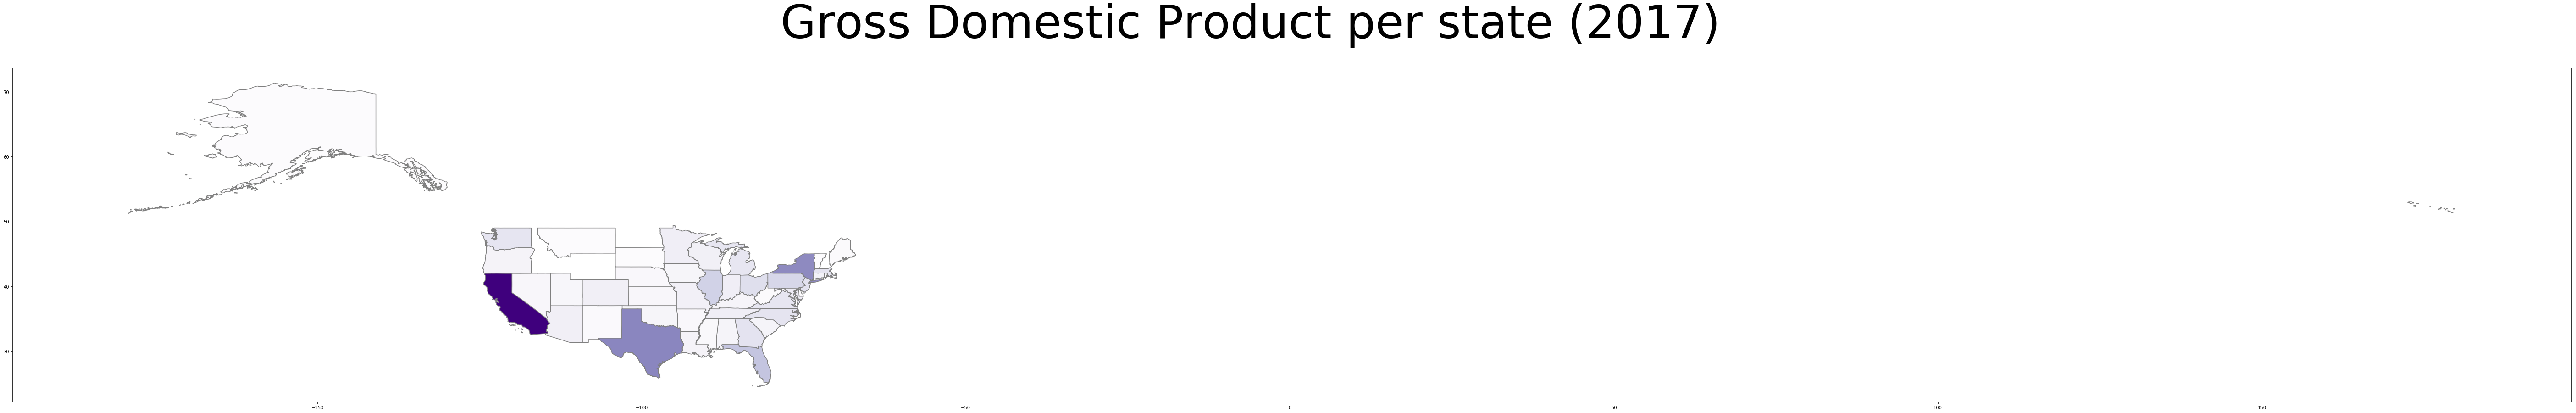

In [38]:
# set a variable that will call whatever column we want to visualise on the map - in this case GDP per state in 2017
variable = '2017'

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(100, 15))

# Create title and center
plt.figtext(.5,.9,'Gross Domestic Product per state (2017)', fontsize=100, ha='center')

# (Orange: # Killed, Blue: # Injured. as seen in bar charts above)
merged.plot(column = variable, cmap = 'Purples', linewidth = 1.5, ax=ax, edgecolor= '0.5')

# Double click on plot to zoom 
'''Fun Fact: Purple is the colour chosen - its what you get when mixing blue and orange!'''

#### <font color = red>Note</font> on interactive maps
The reader will realise that some key states have no data. This is due to lack of data provided in initial GVA dataset where states such as Idaho and Wyoming are missing. All interactive maps, graphs and stats have been affected from bias and skeweness of data.

## Correlation

In [39]:
'''pmap1 is the same as pmap. population dataset. However, the states have been shifted to index column. 
This will allow to correlate a state's population with the number of incidents occured as well as the states gdp'''
pmap1 = pmap.set_index('State')
pmap1.head()

,Rank,Postal,Population
State,,,
Alabama,1,AL,4849377
Alaska,2,AK,736732
Arizona,3,AZ,6731484
Arkansas,4,AR,2966369
California,5,CA,38802500


In [40]:
pmap1.dtypes

Rank          object
Postal        object
Population    object
dtype: object

In [41]:
# Convert pmap1['Population'] column from object to int in order to be able to correlate with other numerical data
pmap1['Population'] = pmap1['Population'].astype(int)
pmap1.dtypes

Rank          object
Postal        object
Population     int32
dtype: object

Correlation: Incidents (Killed + Injured) and GDP per state    **0.78**

In [42]:
# Correlation Incident GDP - cig
cig = t_stt['Total'].corr(merged['2017'])
cig

0.7857341028260636

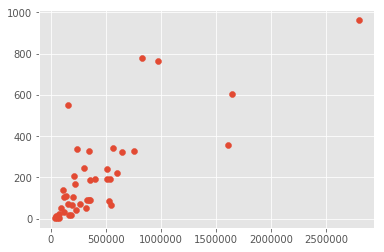

In [43]:
# Visual of correlation between factors
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

# Correlation between GDP and Incidents
plt.scatter(merged['2017'], t_stt['Total'])
plt.show()

Correlation: Incidents (Killed + Injured) and Population per state    **0.83**

In [44]:
## Correlation between incidents per state and population per state. Correlation Incident and Population - cip
cip = t_stt['Total'].corr(pmap1['Population'])
cip

0.8331595747184648

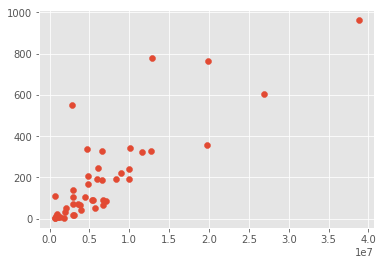

In [45]:
# Correlation between population per state and incidents
plt.scatter(pmap1['Population'],t_stt['Total'])
plt.show()

Correlation: Population and GDP per state   **0.98**

In [46]:
crr2 = pmap1['Population'].corr(merged['2017'])
crr2

0.9819862075162263

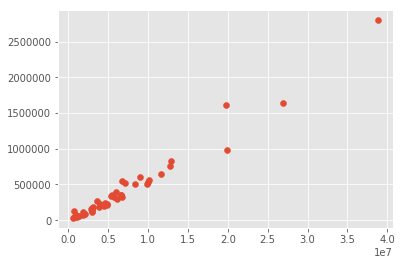

In [47]:
# Correlation between population per state and GDP
plt.scatter(pmap1['Population'], merged['2017'])
plt.show()

## Conclusion
***
This notebook has shown some data manipulation and cleaning that has provided the reader with some stats on the topic. Furthermore, the graphs have shown the severity of gun violence and has visually shown the volume of those killed and injured in each year (t_yr), month (t_mth) and state (t_stt, *timeframe: 2014 - 2018). The notebook then progresses into interactive maps and pinpoints the deadliest incident logged in the compiled Gun Violence Archive dataset. Folium was used for this. It then progessed into mapping other factors such as population per state as well as total incidents occured per state, in which plotly was used. Two interactive choropleth maps were created, providing visual geospatial information. Removal of key states and other data cleaning methods were necessary in order to provide accurate information on both maps. A third library that creates interactive maps is introduced to provide the reader with a variety of ways to see data, geopandas. The map was plotted by merging key elements in a shapefile and the GDP dataset. Finally to test relations between all three factors, a correlation function is adopted. Pearson's linear correlation shows the reader the differing levels of correlation between each factor. The correlation coefficient between shooting incidents in each state and GDP is 0.78, while the correlation coefficient between shooting incidents and total population per state is 0.83 (this could be due to having low GDP per capita and overall high GDP, i.e. imbalance of wealth in certain states). And finally, the correlation between total population and GDP per state is 0.98! 
*** 
To conclude, all three correlations are highly positive however correlation does not imply causation, thus this study is highly hypothetical. Furthermore, the lack of information on 5 key states along with niche datasets (i.e. GDP per state in 2017 and Population per state 2014) cause a lot of bias and skewness in the data. Other factors could be studied such as drug intake, policing, age demographics, etc. Nevertheless, this notebook has provided some interesting findings: more money, more people, more violence.

*Note to self: Leave London and buy a house in Isle of Skye